# Dropout 0.2


In [12]:
import os
import cv2
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd



Lokacija dataset-a

In [13]:
dataset_path = "../data_set"

In [14]:
classes = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]


Inicijalizacija lista za cuvanje podataka


In [15]:
data = []
labels = []

Ucitavanje slika kroz klase


In [16]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Training", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))  # Da sve slike budu 224x224px
        data.append(img)
        labels.append(classes.index(class_name))


Konvertovanje listi u numpy


In [17]:
data = np.array(data) / 255.0  # Normalizacija vrednosti piksela
data = np.expand_dims(data, axis=-1)
labels = np.array(labels)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


ImageDataGenerator za data augmentation


In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

CNN model sa Dropout slojem


In [20]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dodajemo Dropout sloj sa dropout rate-om 0.2
model.add(Dense(len(classes), activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Podešavanje EarlyStopping callback-a
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metrika koja se prati
    min_delta=0.01,  # Minimalna promena koja se detektuje kao poboljšanje
    patience=5,  # Broj epoha bez poboljšanja nakon kojih se obustavlja treniranje
    restore_best_weights=True  # Vraćanje težina modela iz epohe sa najboljom vrednošću nadgledane metrike
)

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
    epochs=70,  # veći broj, jer treniranje može biti prekinuto ranije
    callbacks=[early_stopping]  # early stopping
)

Epoch 1/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.4789 - loss: 1.2299 - val_accuracy: 0.7334 - val_loss: 0.6447
Epoch 2/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7407 - loss: 0.6286 - val_accuracy: 0.7892 - val_loss: 0.4982
Epoch 3/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8515 - loss: 0.3851 - val_accuracy: 0.8275 - val_loss: 0.4079
Epoch 4/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9035 - loss: 0.2339 - val_accuracy: 0.8815 - val_loss: 0.3075
Epoch 5/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9473 - loss: 0.1603 - val_accuracy: 0.8937 - val_loss: 0.2683
Epoch 6/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9614 - loss: 0.1160 - val_accuracy: 0.9007 - val_loss: 0.2636
Epoch 7/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9760 - loss: 0.0631 - val_accuracy: 0.8763 - val_loss: 0.3499
Epoch 8/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9719 - loss: 0.0783 - val_accuracy: 0.8937 - v

Evaluacija modela na test skupu

In [24]:
test_data = []
test_labels = []

In [25]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Testing", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))
        test_data.append(img)
        test_labels.append(classes.index(class_name))


In [26]:
test_data = np.array(test_data) / 255.0
test_data = np.expand_dims(test_data, axis=-1)
test_labels = np.array(test_labels)



Classification report

In [27]:
from sklearn.metrics import classification_report

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step


In [28]:
report = classification_report(test_labels, predicted_classes, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.20      0.33       100
meningioma_tumor       0.67      0.83      0.74       115
        no_tumor       0.57      0.94      0.71       105
 pituitary_tumor       0.93      0.69      0.79        74

        accuracy                           0.67       394
       macro avg       0.77      0.66      0.64       394
    weighted avg       0.75      0.67      0.64       394



Preciznost je visoka za glioma tumore, meningioma tumore, i pituitary tumore, dok je niža za slike bez tumora.

Odziv je visok za meningioma tumore, slike bez tumora i pituitary tumore, ali nizak za glioma tumore, što znači da model propušta veliki broj stvarnih slučajeva glioma tumora.

F1-score vrednosti pokazuju da model ima solidne performanse za većinu klasa, osim za glioma tumore

Kreiranje tabele sa rezultatima


In [29]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)

In [30]:
results = {
    "Model": ["CNN - Dropout(0.2)"],
    "Train Loss": [train_loss],
    "Train Accuracy": [train_accuracy],
    "Validation Loss": [val_loss],
    "Validation Accuracy": [val_accuracy],
    "Test Loss": [test_loss],
    "Test Accuracy": [test_accuracy]
}

In [31]:
results_df = pd.DataFrame(results)

# Čuvanje tabele rezultata kao CSV fajl
results_df.to_csv("model_results_dropout0_2.csv", index=False)

In [32]:
print(results_df)

                Model  Train Loss  Train Accuracy  Validation Loss  \
0  CNN - Dropout(0.2)    0.098331        0.977352         0.268335   

   Validation Accuracy  Test Loss  Test Accuracy  
0             0.893728   2.113135       0.672589  


Rezultati

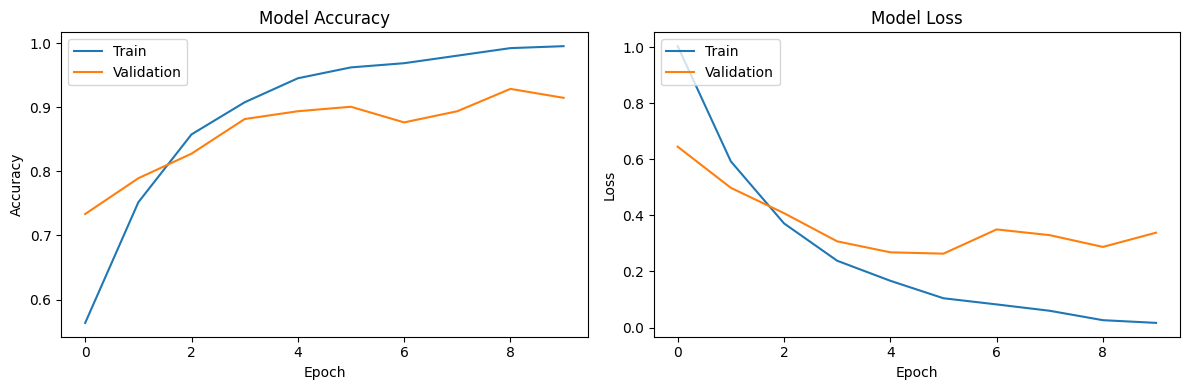

In [33]:
#training history
plt.figure(figsize=(12, 4))

#training & validation accuracy 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# training & validation loss 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Accuracy**

Tacnost na trening skupu postepeno raste i dostize vrlo visoke vrednosti blizu 1.0. Tacnost na validacionom skupu takodje raste, ali se stabilizuje oko 0.85 nakon nekoliko epoha.
Tacnost na validacionom skupu prati tačnost na trening skupu, sto ukazuje na dobru sposobnost generalizacije modela. Medjutim, postoji mali pad performansi na validacionom skupu pred kraj treninga, što može biti znak blagog preprilagodjavanja.

**Loss**

Greska na trening setu dramaticno opada tokom prvih nekoliko epoha i nastavlja da opada do kraja treninga. Greska na validacionom skupu takodje pokazuje stabilan pad, ali ostaje nesto visa u poredjenju sa trening greskom.
Nakon inicijalnog pada, greska na validacionom setu se stabilizuje, sto ukazuje na to da je model naucio neke relevantne karakteristike iz podataka, ali takodje ukazuje na moguci pocetak preprilagodjavanja.